In [1]:
!pip install matplotlib==3.2 markupsafe==2.1.1 nbformat==4.2.0

In [2]:
!pip install pycaret==2.3.9 --upgrade
# !pip install pycaret

In [3]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head(1)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39


In [4]:
from pycaret.clustering import setup, create_model, evaluate_model, predict_model, save_model, load_model

In [5]:
s = setup(df)

,Description,Value
0,session_id,5698
1,Original Data,"(200, 5)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(200, 5)"
9,CPU Jobs,-1


In [6]:
model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4054,127.8505,0.8871,0,0,0


In [7]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [8]:
predict_model(model, data=df)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,Cluster 3
1,2,Male,21,15,81,Cluster 3
2,3,Female,20,16,6,Cluster 0
3,4,Female,23,16,77,Cluster 3
4,5,Female,31,17,40,Cluster 0
...,...,...,...,...,...,...
195,196,Female,35,120,79,Cluster 2
196,197,Female,45,126,28,Cluster 1
197,198,Male,32,126,74,Cluster 2
198,199,Male,32,137,18,Cluster 1


In [9]:
best_model = create_model('kmeans')
save_model(best_model, 'kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4054,127.8505,0.8871,0,0,0


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=['CustomerID'],
                                       ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_nu...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 

In [10]:
model = load_model('kmeans')

Transformation Pipeline and Model Successfully Loaded


In [11]:
import matplotlib.pyplot as plt

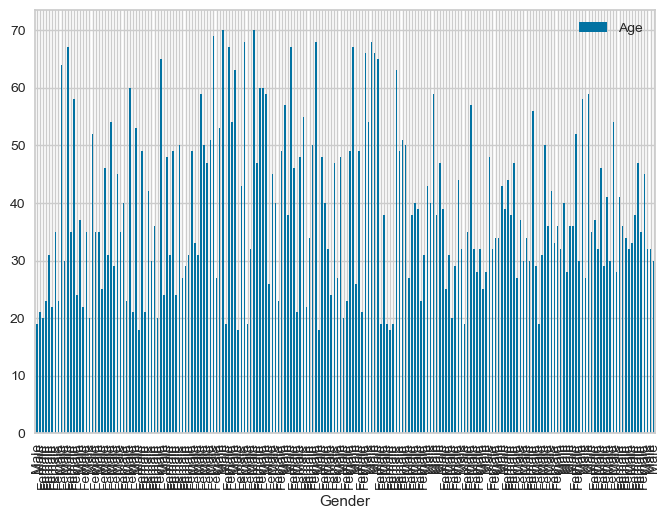

In [12]:
df.plot(x="Gender", y="Age", kind="bar")
df1 = df

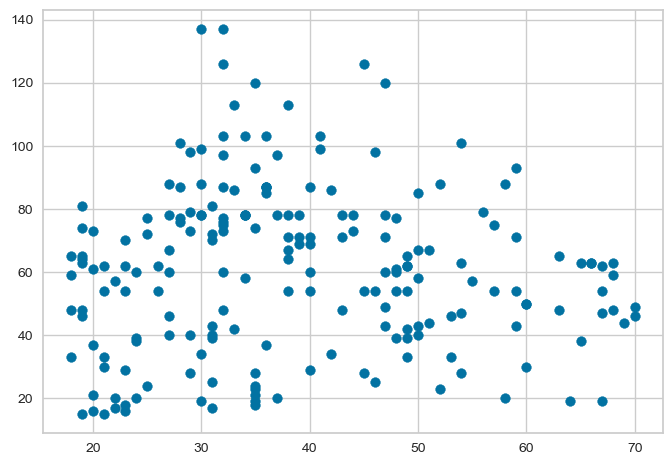

In [13]:
plt.scatter(df["Age"], df["Annual Income (k$)"])
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [30]:
x = df.iloc[:,[3,4]].values

In [34]:
from sklearn.cluster import KMeans
import numpy as np

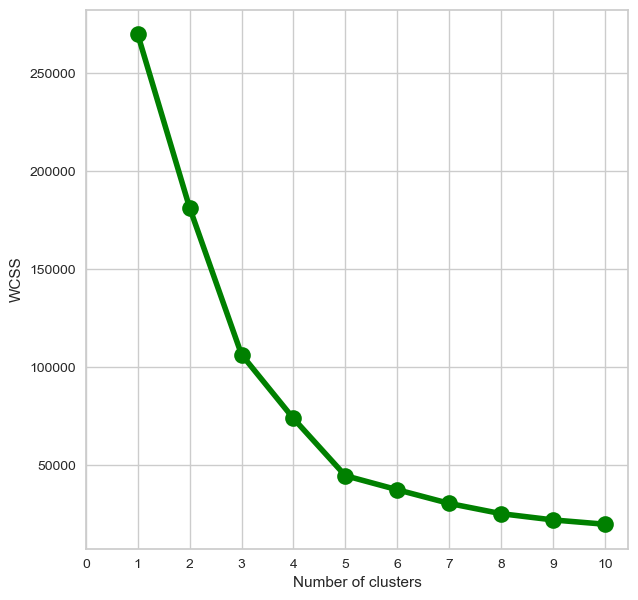

In [35]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [45]:
# finding the clusters based on input matrix "x"
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

In [46]:
import seaborn as sns

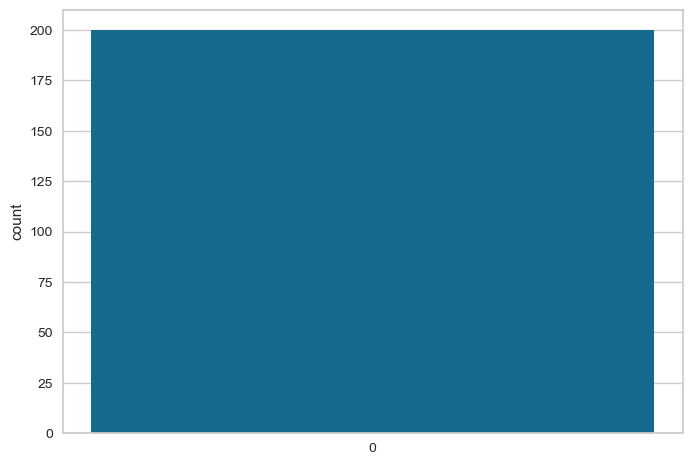

In [47]:
# countplot to check the number of clusters and number of customers in each cluster
sns.countplot(y_clusters)

In [40]:
print(x[y_clusters == 0,0][1])
print(x[y_clusters == 0,1][1])
print(x[y_clusters == 0,2][1])

40
55


IndexError: index 2 is out of bounds for axis 1 with size 2

In [49]:
import plotly.graph_objs as go

IndexError: index 2 is out of bounds for axis 1 with size 2

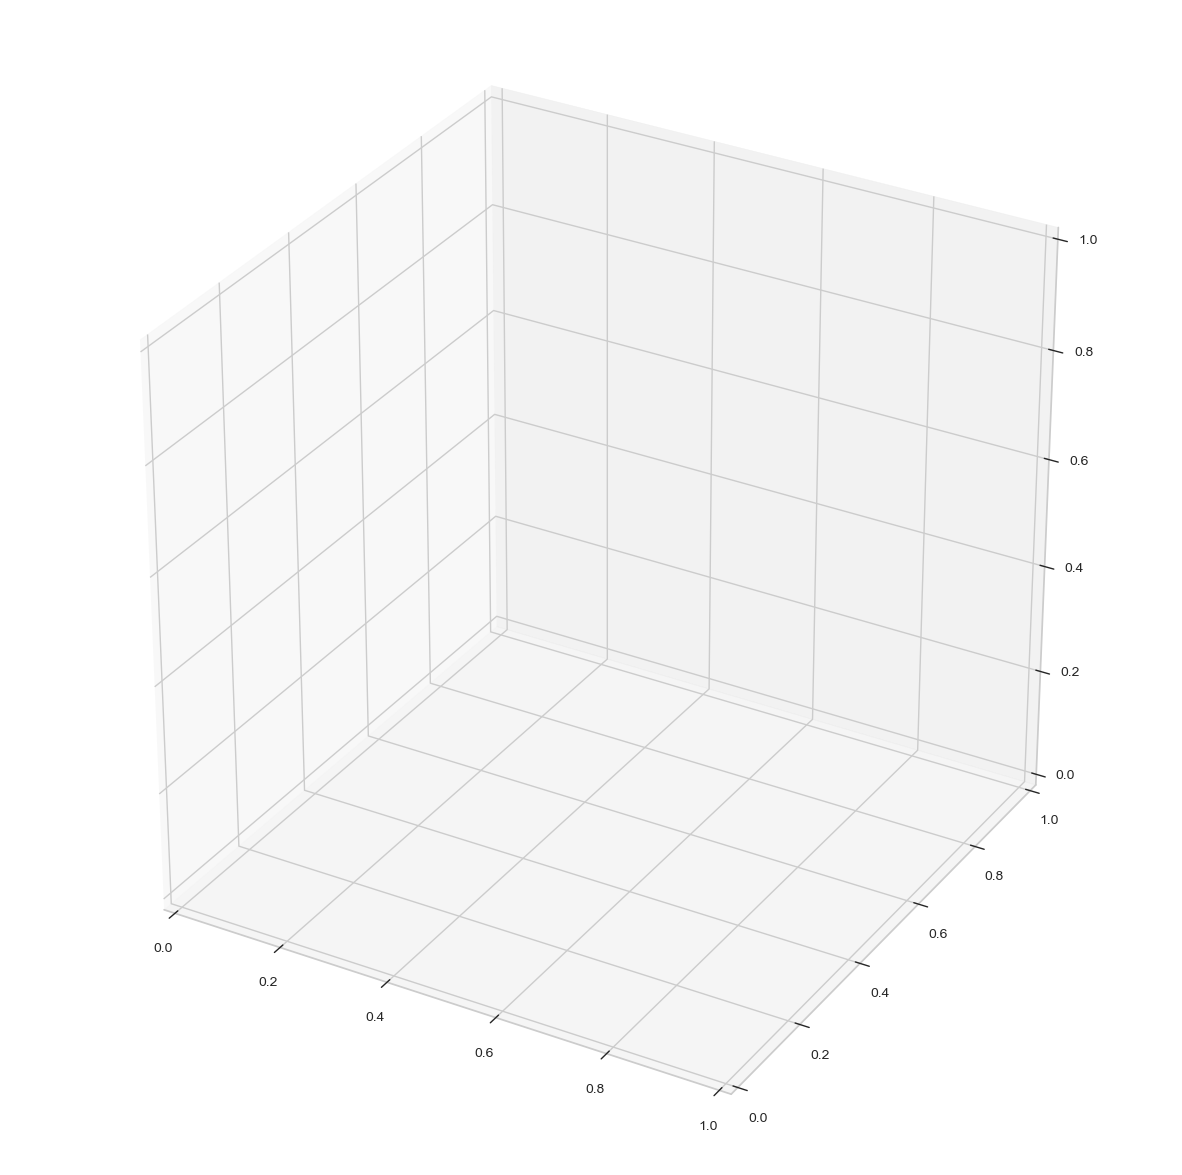

In [50]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.set_xlabel('Age of a customer-->')
ax.set_ylabel('Anual Income-->')
ax.set_zlabel('Spending Score-->')
ax.legend()
plt.show()

In [48]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Age -->'),yaxis = dict(title  = 'Spending Score--->'),zaxis = dict(title  = 'Annual Income-->'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

NameError: name 'go' is not defined